# **THE SPARKS FOUNDATION - GRADUATE ROTATIONAL INTERNSHIP PROGRAM**

## **TASK-3: To Explore Unsupervised Machine Learning**

In this task a **Kmeans Clutering** model is used to predict the optimum number of clusters in Iris Dataset and represent it visually.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

#### LOADING THE DATASETS:

In [2]:
#reading the csv file
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#printing the column names from the dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
print("The number of rows and columns present in the datasets are",data.shape[0],'and',data.shape[1])

The number of rows and columns present in the datasets are 150 and 6


In [5]:
print("The number of Unique classes present in the Species column is",len(data["Species"].unique()))

The number of Unique classes present in the Species column is 3


In [6]:
print("The Unique classes present in the Species column is",data["Species"].unique()[0],',',
      data["Species"].unique()[1],"and",data["Species"].unique()[2])

The Unique classes present in the Species column is Iris-setosa , Iris-versicolor and Iris-virginica


**DATA PREPROCESSINGS:**

In [7]:
#Checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The given data does not contain any missing values.

In [8]:
print("The total number null elements present in the dataset is",(data.isnull().sum()[0])+(data.isnull().sum()[1])+
      (data.isnull().sum()[2])+(data.isnull().sum()[3])+(data.isnull().sum()[4])+(data.isnull().sum()[5]))

The total number null elements present in the dataset is 0


In [9]:
#Printing the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**INSIGHSTS FROM DATASET:**

In the given dataset **six** columns (i.e) **Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species**  are present. The datatype of Id is **int64**, SepalLengthCm is **float64**, SepalWidthCm is **float64**, PetalLengthCm is **float64**, PetalWidthCm is **float64** and Species is **object**. The total number of **rows** is **150** and **columns** is **6**. The SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm columns are the **feature variable** and Species column is the **target variable**. For a given set of values of SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm, the **target Species class** is predicted. Here SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are the input given and Species is the output which is to be predicted using the **classification models**. Here the **Id** column is not an relevant feature variable for predictions as it used for the identification purpose and it does not have any relation with target variable.

**STATISTICAL STUDY ABOUT DATASET:**

In [10]:
print("The descriptive statistics of the dataset is given in the form of table:")
data.describe()

The descriptive statistics of the dataset is given in the form of table:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Printing the median values of each columns
data.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [12]:
#Printing the mode values of each columns
data.mode().head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.0,3.0,1.5,0.2,Iris-setosa


In [13]:
#evaluating the correlation between feature and target variables.
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1, 'Correlation Heatmap')

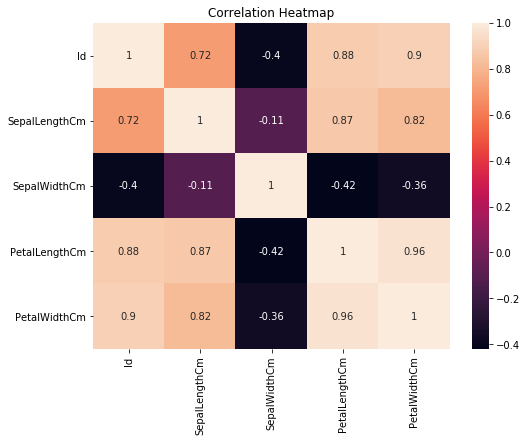

In [14]:
#plotting correlation heat map using visualization libraries
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(data.corr(),annot=True)
heatmap.set_title('Correlation Heatmap')

**DATA VISUALIZATIONS:**

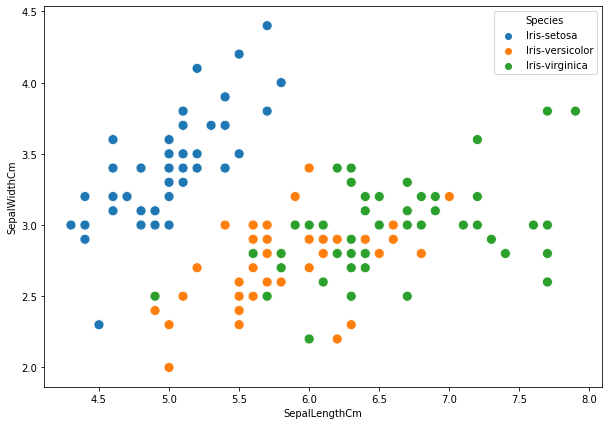

In [23]:
#plotting scatter plot for sepal length and sepal width
plt.figure(figsize=(10,7))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data,s=100)

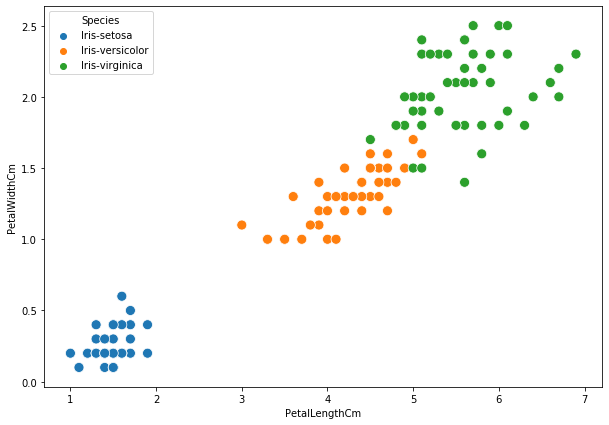

In [24]:
#plotting scatter plot for petal length and petal width
plt.figure(figsize=(10,7))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data,s=100)

**KMEANS CLUSTERING:**

The **k-means** algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The **means** are commonly called the **cluster centroids.**
The K-means algorithm aims to choose **centroids** that minimize the **inertia**, or **within-cluster sum of squared criterion.**

**KMEANS MODEL PERFORMANCE METRICS:**

**Inertia**, or **within-cluster sum-of-squares Inertia**, or the **within-cluster sum of squares criterion(wcss)**, can be recognized as a measure of how internally coherent clusters are. **Inertia** is the **sum of distances** of all points within the cluster from the **centroid** of that cluster. The distance within the clusters is known as **intracluster distance**. **Inertia** gives the **sum of intracluster distances**. The lesser the model **inertia**, the better the **model fit.**

**ELBOW METHOD:**

The **elbow method** is used to determine the optimal **number of clusters** in K-means clustering. The elbow method plots the value of the cost function such as **inertia** produced by different values of K and **n_clusters**.If **K** increases, **average distortion** will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective **centroids**. A **centroid** is a data point at the **centre of a cluster**. However, the improvements in average distortion will decline as K increases. The value of **K** at which improvement in **distortion** declines the most is called the **elbow**, at which we should stop dividing the data into further **clusters.**

#### **MODEL PARAMETER SELECTION:**

In [51]:
#Selecting the desired variables from dataset
x=data.drop(["Id","Species"],axis=1)

In [52]:
#K means clustering model from scikit learn packages
from sklearn.cluster import KMeans

In [53]:
#Craeting an array and storing n_clusters values
cluster_num=[1,2,3,4,5,6,7,8,9,10]

In [54]:
#Creating an array to store the inertia values
inertias =[]
#Creating an array to store the model's scores
scores=[]
#Iterating the model with different n_cluster values
for num in cluster_num:
    best_model=KMeans(n_clusters=num,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
    best_model.fit(x)
    scores.append(best_model.fit(x).score(x))
    inertias.append(best_model.inertia_)
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 1 cluster is",inertias[0])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 2 clusters is",inertias[1])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 3 clusters is",inertias[2])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 4 clusters is",inertias[3])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 5 clusters is",inertias[4])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 6 clusters is",inertias[5])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 7 clusters is",inertias[6])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 8 clusters is",inertias[7])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 9 clusters is",inertias[8])
print("The Inertia or within-cluster sum-of-squares of all data points with respect to 10 clusters is",inertias[9])

The Inertia or within-cluster sum-of-squares of all data points with respect to 1 cluster is 776.9843999999999
The Inertia or within-cluster sum-of-squares of all data points with respect to 2 clusters is 247.652503404007
The Inertia or within-cluster sum-of-squares of all data points with respect to 3 clusters is 78.94084142614601
The Inertia or within-cluster sum-of-squares of all data points with respect to 4 clusters is 59.438165576102406
The Inertia or within-cluster sum-of-squares of all data points with respect to 5 clusters is 47.07446112266112
The Inertia or within-cluster sum-of-squares of all data points with respect to 6 clusters is 39.47761881496882
The Inertia or within-cluster sum-of-squares of all data points with respect to 7 clusters is 35.0701378271487
The Inertia or within-cluster sum-of-squares of all data points with respect to 8 clusters is 33.20837943918826
The Inertia or within-cluster sum-of-squares of all data points with respect to 9 clusters is 28.794850027

#### **FINDING OPTIMAL NUMBER OF CLUSTERS:**

To find optimal values of n_clusters, an elbow graph is constructed with respect to n_clusters, inertias and scores.

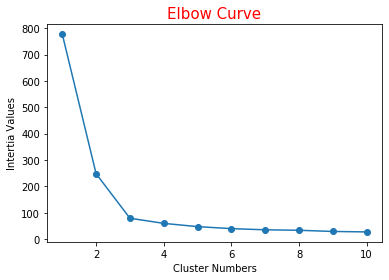

In [55]:
#ploting the elbow curve
plt.plot(cluster_num,inertias,"-o")
plt.xlabel("Cluster Numbers")
plt.ylabel("Intertia Values")
plt.title("Elbow Curve",color='red',fontsize=15)
plt.show()

The optimum value of n_clusters is 3, as it has least inertia value.

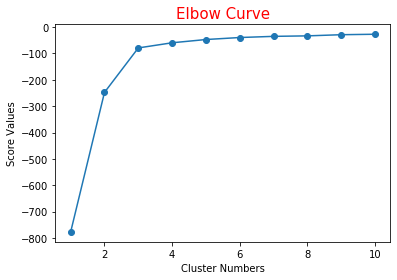

In [56]:
#Plotting the elbow curve
plt.plot(cluster_num,scores,"-o")
plt.xlabel("Cluster Numbers")
plt.ylabel("Score Values")
plt.title("Elbow Curve",color='red',fontsize=15)
plt.show()

The optimum value of n_clusters is 3, as it has high score.

#### MODEL BUILDING:

In [62]:
#Instansiating the k means clustering model
kmeans=KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [63]:
#fitting the model with dataset 
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [92]:
#Printing the three clusters centres for each columns of the dataset
kmeans.cluster_centers_

array([[5.00600000e+00, 3.41800000e+00, 1.46400000e+00, 2.44000000e-01,
        1.00000000e+00],
       [5.90161290e+00, 2.74838710e+00, 4.39354839e+00, 1.43387097e+00,
        2.00000000e+00],
       [6.85000000e+00, 3.07368421e+00, 5.74210526e+00, 2.07105263e+00,
        8.88178420e-16]])

In [98]:
print("The first cluster centre for the sepal length column is",kmeans.cluster_centers_[0][0])
print("The second cluster centre for the sepal length column is",kmeans.cluster_centers_[1][0])
print("The third cluster centre for the sepal length column is",kmeans.cluster_centers_[2][0])

The first cluster centre for the sepal length column is 5.006
The second cluster centre for the sepal length column is 5.901612903225806
The third cluster centre for the sepal length column is 6.85


In [95]:
print("The first cluster centre for the sepal width column is",kmeans.cluster_centers_[0][1])
print("The second cluster centre for the sepal width column is",kmeans.cluster_centers_[1][1])
print("The third cluster centre for the sepal width column is",kmeans.cluster_centers_[2][1])

The first cluster centre for the sepal width column is 3.418
The second cluster centre for the sepal width column is 2.7483870967741932
The third cluster centre for the sepal width column is 3.0736842105263156


In [96]:
print("The first cluster centre for the petal length column is",kmeans.cluster_centers_[0][2])
print("The second cluster centre for the petal length column is",kmeans.cluster_centers_[1][2])
print("The third cluster centre for the petal length column is",kmeans.cluster_centers_[2][2])

The first cluster centre for the petal length column is 1.4639999999999995
The second cluster centre for the petal length column is 4.393548387096774
The third cluster centre for the petal length column is 5.742105263157895


In [97]:
print("The first cluster centre for the petal width column is",kmeans.cluster_centers_[0][3])
print("The second cluster centre for the petal width column is",kmeans.cluster_centers_[1][3])
print("The third cluster centre for the petal width column is",kmeans.cluster_centers_[2][3])

The first cluster centre for the petal width column is 0.24400000000000022
The second cluster centre for the petal width column is 1.4338709677419355
The third cluster centre for the petal width column is 2.0710526315789473


In [64]:
#using the model to cluster the dataset 
kmeans.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [65]:
#Printing the cluster labels of each datas
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [75]:
#Storing the cluster labels to the data frame
data['Cluster'] = kmeans.labels_
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### VISUALIZATIONS:

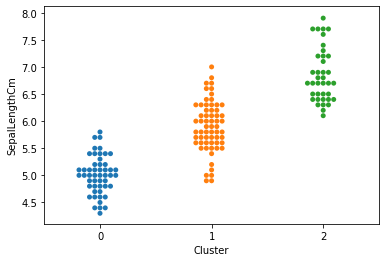

In [84]:
#Plotting the swarmplot of cluster and sepal length
sns.swarmplot(x='Cluster',y='SepalLengthCm',data=data)

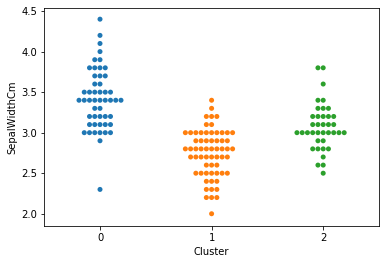

In [85]:
#Plotting the swarmplot of cluster and sepal width
sns.swarmplot(x='Cluster',y='SepalWidthCm',data=data)

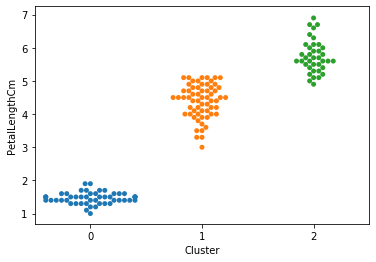

In [86]:
#Plotting the swarmplot of cluster and petal length
sns.swarmplot(x='Cluster',y='PetalLengthCm',data=data)

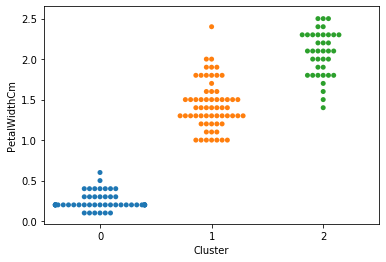

In [87]:
#Plotting the swarmplot of cluster and petal width
sns.swarmplot(x='Cluster',y='PetalWidthCm',data=data)

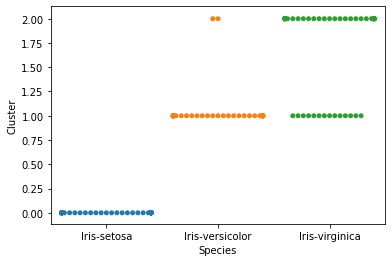

In [91]:
#Plotting the swarmplot of cluster and species
sns.swarmplot(x='Species',y='Cluster',data=data)

In [83]:
#Creating an data frame to store the datas of three cluster values
data1 = data[data['Cluster']==0]
data2 = data[data['Cluster']==1]
data3 = data[data['Cluster']==2]

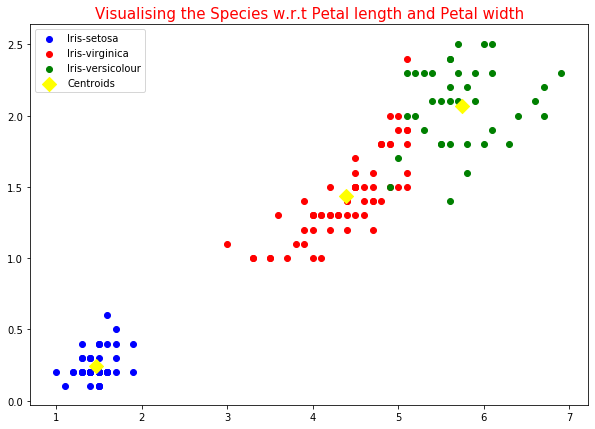

In [89]:
#Visualising the Species w.r.t Petal length and Petal width
plt.figure(figsize=(10,7))
plt.scatter(data1['PetalLengthCm'], data1['PetalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['PetalLengthCm'], data2['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['PetalLengthCm'], data3['PetalWidthCm'],color='green',label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:,3],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Petal length and Petal width',color='Red',fontsize=15)
plt.legend()
plt.show()

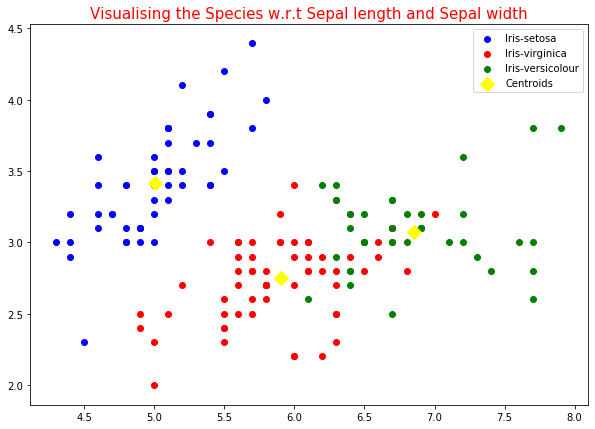

In [90]:
#Visualising the Species w.r.t Sepal length and Sepal width
plt.figure(figsize=(10,7))
plt.scatter(data1['SepalLengthCm'], data1['SepalWidthCm'],color='blue',label ='Iris-setosa')
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(data3['SepalLengthCm'], data3['SepalWidthCm'],color='green',label ='Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],marker='D',color='yellow',label ='Centroids',s=100)
plt.title('Visualising the Species w.r.t Sepal length and Sepal width', color='red',fontsize=15)
plt.legend()
plt.show()